# Coordinate Transformations in 3D

Following on from 2D graphics transformations, we can extend all standard operations into 3D, retaining and using homogenous coordinates. Our objective will again be to combine the required standard sets of operations into a single *composite* matrix.

In [2]:
## Libraries
%matplotlib inline
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sympy as sym

Let's set up a matrix of positions that we can transform.
This time, for arguments sake, we'll play with a 3D triangle, with vertices A (1,0,0), B (1,3,-2) and C (2,2,2).

It is easier to create separate arrays containing $x$, $y$, and $z$ values.

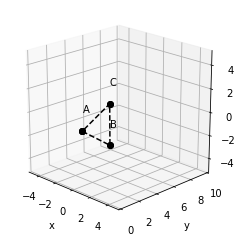

In [3]:
x_vals = np.array([1, 1, 2])
y_vals = np.array([0, 3, 2])
z_vals = np.array([0,-2, 2])
p = np.array([x_vals, y_vals, z_vals])
lx=np.append(x_vals,x_vals[0]) #drawing the line between the last and first coord
ly=np.append(y_vals,y_vals[0])
lz=np.append(z_vals,z_vals[0])
ax = plt.figure().add_subplot(projection='3d')
#ax.view_init(elev=20, azim=315, roll=0)
ax.view_init(20, 315)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.text(lx[0]-1, ly[0]+1, lz[0]+1, "A", c='k')
ax.text(lx[1]-1, ly[1]+1, lz[1]+1, "B", c='k')
ax.text(lx[2]-1, ly[2]+1, lz[2]+1, "C", c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
ax.set_box_aspect([1,1,1])
plt.show()

## Homogenous coordinates

Like the 2D case, 3D transforms require homogenous coordinates, in order to correctly format positions ready for transformation. Our points are currently listed as an array, with the first row being the $x$-coords, and the second row as $y$-coords.

To transform using matrices, we need to have each *column* list a different dimension. We also need to extend each 2D set of points to contain an extra dimension, known as homogenous coordinates. Our plan will be to add these extra coordinates first, then switchs rows and columns (an operation known as the "transpose" of a matrix).

In [7]:
newrow = [1, 1, 1]
hp = np.vstack([p, newrow])
print(hp.transpose())

[[ 1  0  0  1]
 [ 1  3 -2  1]
 [ 2  2  2  1]]


Note that each of the vertices of the object are listed as we saw in the lectures, with set of coordinates each inhabiting its own row.

## Rotation


In 3D we have three axis to rotate about (unlike 2D, where rotations are always about $z$, i.e. in the $x,y$-plane). A different transformation is required in each case:

$$
R_{\theta_{z,\underline{k}}}=
	\begin{pmatrix}
	\cos(\theta_z) & \sin(\theta_z) & 0  & 0 \\
	-\sin(\theta_z) & \cos(\theta_z) & 0 & 0 \\
	0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix}, ~~~
R_{\theta_{y,\underline{j}}}=
	\begin{pmatrix}
	\cos(\theta_y) & 0 & -\sin(\theta_y) & 0  \\
	0 & 1 & 0 & 0 \\
	\sin(\theta_y) & 0 & \cos(\theta_y) & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix},~~~ 
R_{\theta_{x,\underline{i}}}=
	\begin{pmatrix}
	1 & 0 & 0 & 0\\
	0 & \cos(\theta_x) & \sin(\theta_x) & 0 \\
	0 & -\sin(\theta_x) & \cos(\theta_x) & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix}
$$

Lets test this: I'll create matrices describing a $180^o$ rotation about the $x$-axis and a $45^o$ rotation about the $y$-axis.

In [8]:
thetax = 180
thetay = 45
R_thetai = np.matrix([[1, 0, 0, 0],
                      [0, np.cos(math.radians(thetax)), np.sin(math.radians(thetax)), 0], 
                      [0, -np.sin(math.radians(thetax)), np.cos(math.radians(thetax)), 0], 
                      [0, 0, 0, 1]])
R_thetaj = np.matrix([[np.cos(math.radians(thetay)), 0, -np.sin(math.radians(thetay)), 0],
                      [0, 1, 0, 0], 
                      [np.sin(math.radians(thetay)), 0, np.cos(math.radians(thetay)), 0], 
                      [0, 0, 0, 1]])  

Rotations *must* be performed at the origin. We therefore also need to set up matrices which will translate our coordinates to the origin before the rotation ($T_{\underline{w}}$) and return the object to its original position afterwards (T_{\underline{v}}). The general form of the translation matrices are:

$$
T_{\underline{w}} = 
	{\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	-a & -b & -c & 1 
	\end{pmatrix}},~~~
T_{\underline{v}} =
	\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0& 0  \\
	0 & 0 & 1 & 0 \\
	a & b & c & 1 
	\end{pmatrix}	
$$
in order to move a position $(a,b,c)$ to the origin and back.

We need to pick one part of the object, and work out how far it must be moved to place it at the origin. We then translate the whole object by the same amount. In practice this means choosing *any* of the vertices, and replacing $(a,b,c)$ with these values in the matrices.

We also have to remember to **PRE-MULTIPLY** (due to the standard graphics pipeline approach). This may be different in other web resources and textbooks, but they may use different pipelines or codes.

For argument's sake, we could use vertex A ($1,0,0$) to translate:

In [11]:
Tw = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [-1,0, 0, 1]])
Tv = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [1,0, 0, 1]]) 

In [12]:
rp = hp.transpose()*Tw*R_thetaj*Tv

It very difficult to confirm that the rotation appears as we might expect in 3D. In the plotting commands below, play with the azimuth parameter in the "ax.view_init" command to view the plot at different angles to verify the behaviour is reasonable:

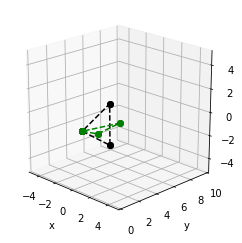

In [20]:
newrp = rp[:,0:3].transpose()
x_vals2 = np.squeeze(np.asarray(newrp[0,:]))
y_vals2 = np.squeeze(np.asarray(newrp[1,:]))
z_vals2 = np.squeeze(np.asarray(newrp[2,:]))
rlx=np.append(x_vals2,x_vals2[0])
rly=np.append(y_vals2,y_vals2[0])
rlz=np.append(z_vals2,z_vals2[0])

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(20,315) ## azimuth controls
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.plot(rlx, rly, rlz, 'go', linestyle="--")
ax.plot(x_vals2, y_vals2, z_vals2, 'go')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
ax.set_box_aspect([1,1,1])
plt.show()

Try varying the rotation angle in this example, or change the viewing angle in the plot to confirm the rotation you have created is being carried out correctly.

## Scaling


We learned in lectures to take our position vectors, and scale by the scaling matrix (provided that the object sits at the origin). The scaling matrix has the familiar form:

$$
S_{S_x,S_y,S_z} =
\begin{pmatrix}
	S_x & 0 & 0 & 0\\
	0 & S_y & 0 & 0\\
	0 & 0 & S_z & 0\\
	0 & 0 & 0 & 1
\end{pmatrix},
$$

We'll leave the object unstretched in $x$, but make it three times bigger in $y$ and half as big in $z$. This creates a scaling matrix that looks like:

In [21]:
Sxyz = np.matrix([[1, 0, 0, 0], 
                 [0, 3, 0, 0], 
                 [0, 0, 0.5, 0],
                 [0, 0, 0, 1]]) 

Remember, if we wish to scale or rotate, we have to move the object to the origin. We will re-use the translation matrices defined earlier to complete the scaling.

Therefore we need to take the (transpose of the) coordinates, and multiply by the translation, scaling, and translation back matrices:

In [22]:
sp = hp.transpose()*Tw*Sxyz*Tv

Don't worry about this step: we'll use the "np.squeeze" command to make the arrays the correct shape for Python to handle properly..

In [23]:
newp = sp[:,0:3].transpose()
x_vals1 = np.squeeze(np.asarray(newp[0,:]))
y_vals1 = np.squeeze(np.asarray(newp[1,:]))
z_vals1 = np.squeeze(np.asarray(newp[2,:]))
slx=np.append(x_vals1,x_vals1[0])
sly=np.append(y_vals1,y_vals1[0])
slz=np.append(z_vals1,z_vals1[0])

Finally let's view the results: we can overplot the original triangle coords (black) with our new scaled version (red). 

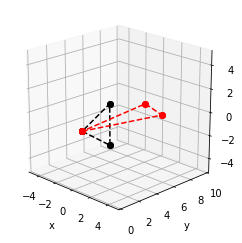

In [24]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(20,315)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.plot(slx, sly, slz, 'ro', linestyle="--")
ax.plot(x_vals1, y_vals1, z_vals1, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
ax.set_box_aspect([1,1,1])
plt.show()

You can see that the object is now three times bigger in $y$, and has been squashed in $z$. Due to the viewing perspective in 3D, it is much more difficult to directly confirm exact sizes visually. Try modifying the azimuth and elevation in the plot (in the "ax.view_init()" command, first number is an angle relative to the z=0 plane, second is an angle relative to y=0 plane) to confirm the sizes in the $x$, $y$ and $z$ directions.

## Combining operations



We can also reuse the operations defined above as an example of how several transformations may be combined into one single matrix. This single matrix contains all the information about each individual operation to be performed.

Let's see what happens if we apply several operations to our set of coordinates. We'll perform (in order):



1.   Translation to the origin.
2.   Rotation in $x$ by $180^o$.
3.   Rotation in $y$ by $45^o$.
4.   Scale by 3 in $y$, 0.5 in $z$.
5.   Translation back to original point.

If we wanted to do this one by one, we'd need 5 commands, each operating on the previous result:

In [26]:
op1 = hp.transpose()*Tw
op2 = op1*R_thetai
op3 = op2*R_thetaj
op4 = op3*Sxyz
op5 = op4*Tv

Alternatively, we could just use one single command to create the same result and then apply it to as many sets of coordinates as we like:

In [30]:
op_c = Tw*R_thetai*R_thetaj*Sxyz*Tv
op5c = hp.transpose()*op_c

Let us confirm the results of both approaches:

In [31]:
print("linear ops coords:\n", op5[:,0:3].transpose())

linear ops coords:
 [[ 1.          2.41421356  0.29289322]
 [ 0.         -9.         -6.        ]
 [ 0.          0.70710678 -1.06066017]]


In [32]:
print("concatenated ops coords:\n", op5c[:,0:3].transpose())

concatenated ops coords:
 [[ 1.          2.41421356  0.29289322]
 [ 0.         -9.         -6.        ]
 [ 0.          0.70710678 -1.06066017]]


Both results are identical: concatenating all operations into one matrix produces identical results compared to performing successive individual operations on the same set of coordinates.

This is what makes concatenation so much more efficient. 

If I wanted to perform the transformation again for different coordinates, I would have to repeat all five operations if carried out successively. I can't store these, as each relies on the previous application, and the first step depends on the coordinates I want to transform. 

By storing and using the concatenated matrix, I can reduce the number of operations to only one: multiplying it by the new coordinates. This may seem only a trivial saving, but for objects comprising of many millions of coordinates, this can significantly improve calculation efficiency!